11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
✅ Training data shape: (60000, 28, 28, 1)
✅ Test data shape: (10000, 28, 28, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 110ms/step - accuracy: 0.8119 - loss: 0.5926 - val_accuracy: 0.9756 - val_loss: 0.0733
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 52s 111ms/step - accuracy: 0.9676 - loss: 0.1074 - val_accuracy: 0.9856 - val_loss: 0.0422
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 109ms/step - accuracy: 0.9779 - loss: 0.0746 - val_accuracy: 0.9886 - val_loss: 0.0346
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 110ms/step - accuracy: 0.9812 - loss: 0.0614 - val_accuracy: 0.9896 - val_loss: 0.0313
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 109ms/step - accuracy: 0.9850 - loss: 0.0515 - val_accuracy: 0.9906 - val_loss: 0.0283

🎯 Test Accuracy: 99.06%


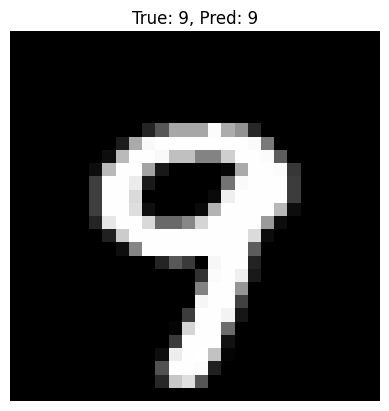

In [1]:
# ==============================
# Handwritten Digit Recognition (MNIST) - Runs Perfectly in Google Colab
# ==============================

# 1. Import Libraries (Colab already has TensorFlow)
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# 2. Load and Preprocess MNIST Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(f"✅ Training data shape: {x_train.shape}")
print(f"✅ Test data shape: {x_test.shape}")

# 3. Build a CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 4. Train the Model
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=5,
    batch_size=128,
    verbose=1
)

# 5. Evaluate the Model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\n🎯 Test Accuracy: {accuracy * 100:.2f}%")

# 6. Function to Visualize Predictions
def visualize_prediction(index):
    img = x_test[index]
    true_label = np.argmax(y_test[index])
    pred_label = np.argmax(model.predict(img.reshape(1, 28, 28, 1), verbose=0))

    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"True: {true_label}, Pred: {pred_label}")
    plt.axis('off')
    plt.show()

# Show a random prediction
random_index = np.random.randint(0, len(x_test))
visualize_prediction(random_index)
